<a href="https://colab.research.google.com/github/MagadeviS/Airbnb-Booking-Data-Analysis/blob/main/Airbnb_Bookings_Analysis(1010)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

We will perform exploratory data analysis with python to get insight from the data.

## **We will try to answer the following Questions**
1.Which hosts are the busiest and why?

2.Find the price range in respective neighbourhood(min,max and average price)

3.Find the price range from highest to lowest order?

4.How room types occupied by a neighbourhood group?

5.Find availability of room for each neighbourhood group ?

6.Find the Top 10 place name based on number of reviews?


Let’s start:

# **Import Packages**

First Import necessary packages and import the dataset

In [ ]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# import matplot
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

Now import and display the dataset

In [ ]:
1 # Import Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read csv file
file_path = '/content/drive/MyDrive/Airbnb NYC 2019 (1).csv'
airbnb_df1=pd.read_csv(file_path)

# **Data Preprocessing**
First copy the dataset, so our original dataset remains unchanged

In [ ]:
airbnb_df = airbnb_df1.copy()
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


To get the details about Airbnb file

In [ ]:

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Dealing with Missing Values**

Check if our data contains any missing values

Find the missing value, show the total null values for each column and sort it in descending order

In [ ]:
airbnb_df.isnull().sum().sort_values(ascending=False)[:10]

last_review            10052
reviews_per_month      10052
host_name                 21
name                      16
id                         0
host_id                    0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
dtype: int64


In the 'reviews_per_month','last_review','host_name','name' columns have null values, so for all the missing values, we will just replace it with 0.

We can ignore the null values present in name and host_name columns as we have host_id and property_id for the analysis.

In [ ]:
airbnb_df[['reviews_per_month','last_review']] = airbnb_df[['reviews_per_month','last_review']].fillna(0.0)

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# **Exploratory Data Analysis**

Now let’s do the fun part, extract the information from our data and try to answer our questions.



Now we have to plot the heatmap for find the correlation between the data.

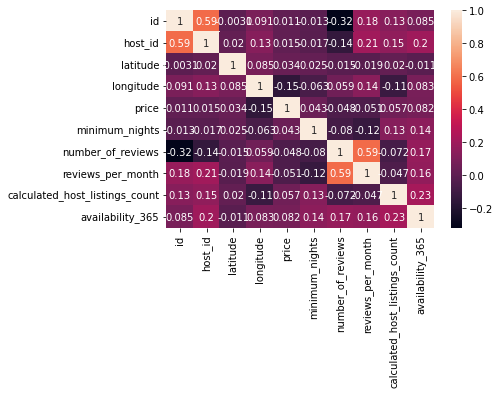

In [ ]:
sns.heatmap(airbnb_df.corr(),annot= True)

From the above plot, we know that there is not a strong correlation between the data except review_per_month and number_of_review.

# **1. Which hosts are the busiest and why?**

To find the solution for this question, we have to Group by "host_id" and "host_name" and count the "host_listing_ count" by using Count method.

In [ ]:
hosts_areas = airbnb_df.groupby(['host_id','host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()

hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head()

,host_id,host_name,neighbourhood_group,calculated_host_listings_count
34740,219517861,Sonder (NYC),Manhattan,327
29481,107434423,Blueground,Manhattan,230
19626,30283594,Kara,Manhattan,121
12839,12243051,Sonder,Manhattan,96
14475,16098958,Jeremy & Laura,Manhattan,96


From the above analysis, we can observe that the Sonder(NYC) from Manhattan is the busiest host and having maximum number of properties.

## **2.Find the price range with respective to neighbourhood group (min,max and average price)**

Let’s write the code to get the price range with respect to neighbourhood(min,max, and average)

In [ ]:
airbnb_df.groupby(['neighbourhood_group'],dropna=True).agg({'price' :['mean', 'min', 'max']})

price           
                           mean min    max
neighbourhood_group                       
Bronx                 87.496792   0   2500
Brooklyn             124.383207   0  10000
Manhattan            196.875814   0  10000
Queens                99.517649  10  10000
Staten Island        114.812332  13   5000

Here , I grouped the Neighbourhood_group by groupby method and then computed aggregation like mean price ,minimum price, maximum price.


 Below we plot the scatter plot between the neighbourhood group and Price.

Text(0, 0.5, 'Price')

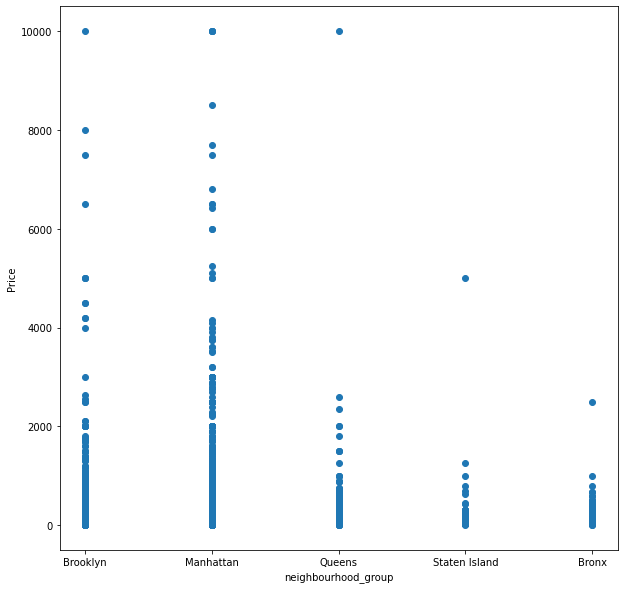

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x='neighbourhood_group',y='price',data=airbnb_df)
plt.xlabel('neighbourhood_group')
plt.ylabel('Price')

From the above scattor plot , we can observe that the maximum number people from manhattan and the highest price also same group. So now we can undertand that the price does not affect to  visiting people.


## **3.Find the price range from highest to lowest order**

Let’s answer another question, the price range from highest price to lowest price

In [ ]:
new_data = [airbnb_df['name'],airbnb_df['host_name'],airbnb_df['neighbourhood_group'],airbnb_df['neighbourhood'],airbnb_df['room_type'],airbnb_df['price']]
new_df = pd.concat(new_data, axis=1)
new_df.sort_values("price",ascending = False)


,name,host_name,neighbourhood_group,neighbourhood,room_type,price
9151,Furnished room in Astoria apartment,Kathrine,Queens,Astoria,Private room,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Erin,Brooklyn,Greenpoint,Entire home/apt,10000
29238,1-BR Lincoln Center,Jelena,Manhattan,Upper West Side,Entire home/apt,10000
40433,2br - The Heart of NYC: Manhattans Lower East ...,Matt,Manhattan,Lower East Side,Entire home/apt,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",Amy,Manhattan,Lower East Side,Private room,9999
...,...,...,...,...,...,...
25778,Modern apartment in the heart of Williamsburg,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0
25796,Cozy yet spacious private brownstone bedroom,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0
25433,★Hostel Style Room | Ideal Traveling Buddies★,Anisha,Bronx,East Morrisania,Private room,0
26841,Coliving in Brooklyn! Modern design / Shared room,Sergii,Brooklyn,Bushwick,Shared room,0


Here, I selected only the required column and stored it in a separate Dataframe. Then I sorted the price range from Maximum to Minimum.
From that, we can find the "Furnished room in Astoria apartment" ,"Luxury 1 bedroom apt. -stunning Manhattan views" and "1-BR Lincoln Center" which are the most expensive.





## **4.How room types occupied by a neighborhood group?** 

To answer this question, We groupby the neighbourhood group and Room type and counted the room types after that unstacked the each room type.



In [ ]:
new_dff = airbnb_df.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()
print(new_dff)

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            379           652           60
Brooklyn                        9559         10132          413
Manhattan                      13199          7982          480
Queens                          2096          3372          198
Staten Island                    176           188            9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


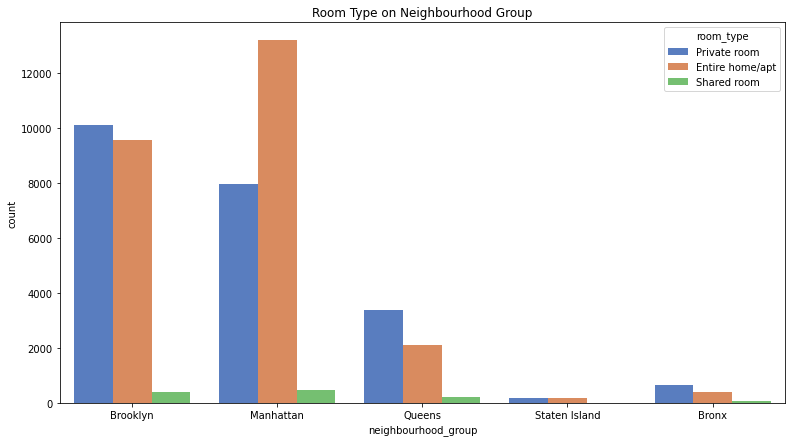

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(airbnb_df.neighbourhood_group,hue=airbnb_df.room_type, palette="muted")
plt.show()

From that, we can observe that the neighbourhood groups Brooklyn and Manhattan in which room type of private room and Entire home/apt only mostly occupied.



## **5. Find availablity of room for each neighbourhood group ?**

To see the room availability for Each neighbourhood group plot the boxpot between the neighbourhood_group vs. availablity_365 columns.

Let’s see the boxplot for each type of neighbourhood groups.

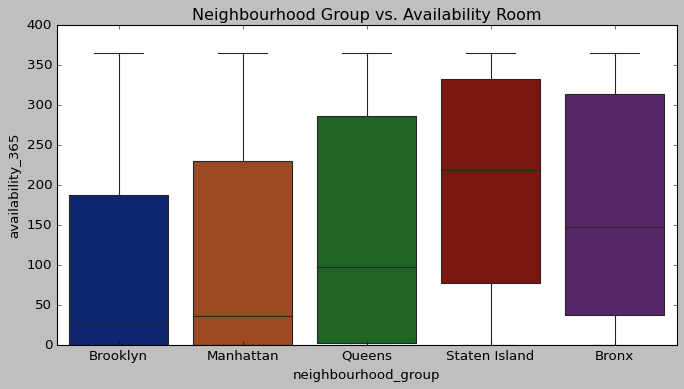

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

The graph above shows the relationship between the availability room and neighborhood group.


## **6.Find the Top 10 place name based on number of reviews?**

To solve this question, we keep only the required column from the dataframe, the sorting the number of reveiws from maximum to minimum. 
Now we plot the line plot between place name vs number of reveiws for better understanding.

                                                    name  ... number_of_reviews
11759                            Room near JFK Queen Bed  ...               629
2031                          Great Bedroom in Manhattan  ...               607
2030                      Beautiful Bedroom in Manhattan  ...               597
2015                        Private Bedroom in Manhattan  ...               594
13495                            Room Near JFK Twin Beds  ...               576
10623                  Steps away from Laguardia airport  ...               543
1879            Manhattan Lux Loft.Like.Love.Lots.Look !  ...               540
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE  ...               510
4870                  Private brownstone studio Brooklyn  ...               488
471                      LG Private Room/Family Friendly  ...               480

[10 rows x 3 columns]


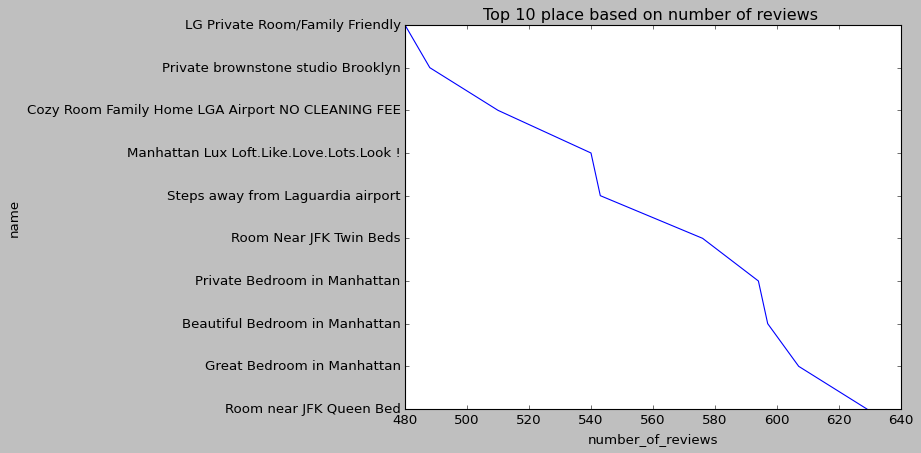

In [ ]:
Keep_column = [airbnb_df["name"],airbnb_df['neighbourhood_group'],airbnb_df["number_of_reviews"]]
new_df2 = pd.concat(Keep_column, axis=1)
top_reveives = new_df2.sort_values(by = "number_of_reviews",ascending = False).head(10)
print(top_reveives)
x = top_reveives["number_of_reviews"]
y = top_reveives["name"]
plt.plot(x, y)
plt.xlabel("number_of_reviews")
plt.ylabel("name")
plt.title("Top 10 place based on number of reviews ")
plt.show()

From the above plot, we can conclude that the place of "Room near JFK Queen Bed" is having maximum number of reveiws.